# 프로젝트 3: CIFAR10 딥러닝 모델

### 데이터 로드 및 전처리

In [1]:
# 필요 패키지(라이브러리) import

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [3]:
# keras.datasets에서 cifar10 데이터셋을 로드하고, 

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [5]:
# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2, random_state=2023)

In [7]:
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [8]:
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [9]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.

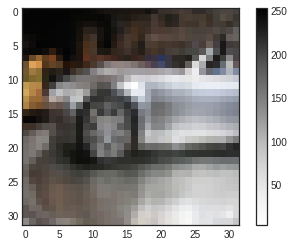

In [12]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [13]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.

In [14]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
# 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [16]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

In [17]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [18]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.

In [19]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일

In [20]:
# BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [21]:
# 1) 모델 구성

In [22]:
model = models.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(2048),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [23]:
# 2) 컴파일

In [24]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

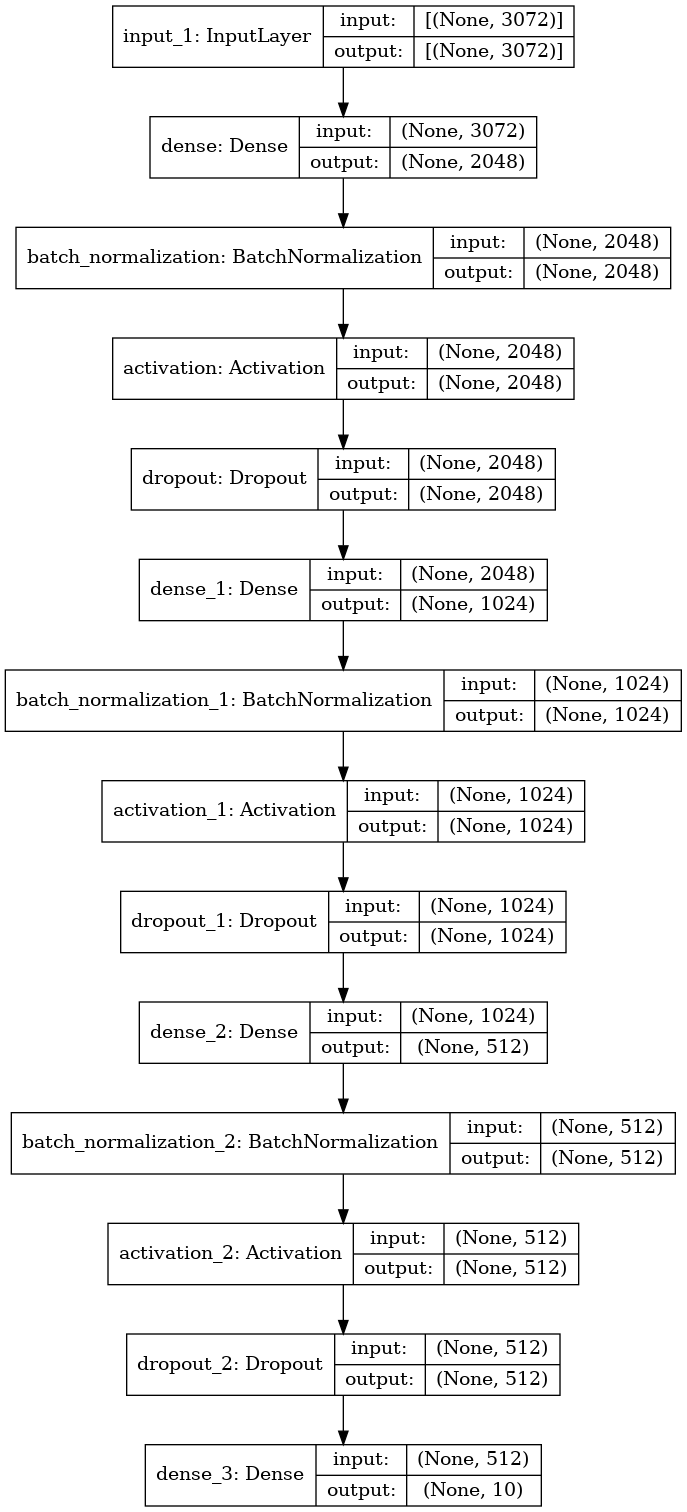

In [26]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

### 모델 학습

In [27]:
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [28]:
from tensorflow.keras import callbacks

mc = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
                                           

In [29]:
es = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                             restore_best_weights=True)      

In [30]:
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[mc, es])

Epoch 1/50
1250/1250 [==============================] - 7s 4ms/step - loss: 1.9295 - accuracy: 0.3278 - val_loss: 1.5942 - val_accuracy: 0.4417
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6815 - accuracy: 0.4026 - val_loss: 1.5066 - val_accuracy: 0.4699
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5799 - accuracy: 0.4351 - val_loss: 1.4753 - val_accuracy: 0.4823
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5099 - accuracy: 0.4589 - val_loss: 1.4540 - val_accuracy: 0.4839
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4664 - accuracy: 0.4753 - val_loss: 1.4158 - val_accuracy: 0.5000
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4257 - accuracy: 0.4882 - val_loss: 1.4060 - val_accuracy: 0.5002
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3962 - accuracy: 0.5004 - val_loss: 1.3618 - val_accuracy:

In [31]:
# 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

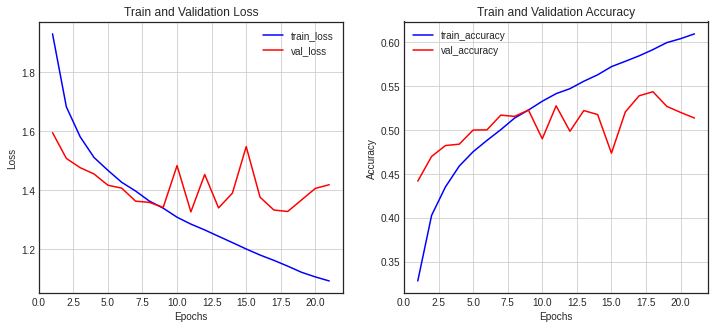

In [32]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [33]:
# 테스트 데이터를 이용해 모델 성능을 평가하기

In [34]:
loaded_model = models.load_model('cifar10_model.h5')
loaded_model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 1.3019 - accuracy: 0.5344


0.5343999862670898